torch.float32
tensor([[[[ 0.9843,  0.9843,  0.9843,  ...,  0.9922,  0.9922,  0.9922],
          [ 0.9922,  0.9922,  0.9922,  ...,  0.9922,  0.9922,  0.9922],
          [ 0.9843,  0.9843,  0.9843,  ...,  0.9922,  0.9922,  1.0000],
          ...,
          [ 0.1294,  0.1137,  0.1216,  ...,  0.0196, -0.0039, -0.0275],
          [ 0.1451,  0.1216,  0.1137,  ...,  0.0353,  0.0039, -0.0275],
          [ 0.1529,  0.1059,  0.0902,  ...,  0.0510,  0.0588,  0.0353]],

         [[ 0.9843,  0.9843,  0.9843,  ...,  0.9922,  0.9922,  0.9922],
          [ 0.9922,  0.9922,  0.9922,  ...,  0.9922,  0.9922,  0.9922],
          [ 0.9843,  0.9843,  0.9843,  ...,  0.9922,  0.9922,  1.0000],
          ...,
          [ 0.0667,  0.0745,  0.0824,  ..., -0.0118, -0.0353, -0.0588],
          [ 0.0824,  0.0824,  0.0745,  ...,  0.0039, -0.0275, -0.0588],
          [ 0.0902,  0.0667,  0.0510,  ...,  0.0196,  0.0275,  0.0039]],

         [[ 0.9843,  0.9843,  0.9843,  ...,  0.9922,  0.9922,  0.9922],
          [ 0.99

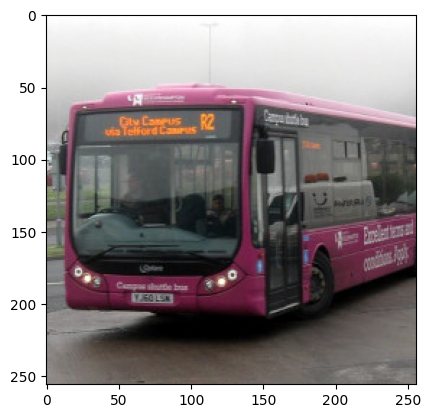

In [1]:
import matplotlib.pyplot as plt 
import torchvision
import torch
import torchvision.transforms

import os
ROOT_DIR = os.getcwd()

# from torch.nn.functional.normalize import normalize
from PIL import Image
import requests
from io import BytesIO


# url = 'https://i.ibb.co/vzTrZdG/IMG-20231120-134058.jpg'
# description = "yellow fire hydrant surrounded by grass with graffiti on it"

url = 'https://i.ibb.co/nkQMZFp/8271608039-ff6289fcdb-z.jpg'
description = "a pink bus that is parked on a roadway"

response = requests.get(url)
img = Image.open(BytesIO(response.content))
plt.imshow(img)

transform = torchvision.transforms.Compose([ 
    torchvision.transforms.PILToTensor() 
]) 
  
# transform = transforms.PILToTensor() 
# Convert the PIL image to Torch tensor 
img_tensor = transform(img) 

MY_LOWRES_COND_IMG = img_tensor
img_tensor = img_tensor.view((1,3,256,256))
img_tensor = img_tensor.to(torch.float).cuda()

for i in range(3):
    for j in range(256):
        for k in range(256):
            img_tensor[0][i][j][k] = img_tensor[0][i][j][k] / 255 * 2 - 1

print(img_tensor.dtype)
print(img_tensor)       


MY_LOWRES_COND_IMG = img_tensor

In [2]:
!pip install git+https://github.com/MAGNETO903/dalle2-laion.git
!pip install git+https://github.com/MAGNETO903/DALLE2-pytorch.git
!pip install pydantic==1.10.6

  Cloning https://github.com/MAGNETO903/dalle2-laion.git to /tmp/pip-req-build-qq3gxem_
  Running command git clone --filter=blob:none --quiet https://github.com/MAGNETO903/dalle2-laion.git /tmp/pip-req-build-qq3gxem_
  Resolved https://github.com/MAGNETO903/dalle2-laion.git to commit 6d0982f3c90f0d7f5178a04b144fbf7bc856d930
  Preparing metadata (setup.py) ... done
  Obtaining dependency information for dalle2-pytorch from https://files.pythonhosted.org/packages/9a/db/e6b0d7f1209db8794799d2438ac949bac1b0c4cd59d97a7059f0a0c342f3/dalle2_pytorch-1.15.6-py3-none-any.whl.metadata
  Obtaining dependency information for open-clip-torch<3.0.0,>=2.0.0 from https://files.pythonhosted.org/packages/7c/7f/952fdffa17b15d0c7c51a730860fcf4f4982528ecc753b190dcd46cc944b/open_clip_torch-2.23.0-py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 19.2 MB/s eta 0:00:0000:0100:01
  Obtaining dependency information for coca-pytorch>=0.0.5 from https://files.pythonhosted.org/pack

In [3]:
from urllib.request import urlopen
link = "https://pastebin.com/raw/iRG1dBwy" 
f = urlopen(link)
myfile = f.read()
with open('my_config.json', 'wb') as file:
    file.write(myfile)

In [ ]:
from dalle2_laion import ModelLoadConfig, DalleModelManager
from dalle2_laion.scripts import InferenceScript
from PIL import Image

class ExampleInference(InferenceScript):
    def run(self, text: str) -> Image:
        """
        Takes a string and returns a single image.
        """
        text = [text]
        image_embedding_map = self._sample_prior(text)
        image_embedding = image_embedding_map[0][0]
        image_embedding = image_embedding.unsqueeze(0)
        image_map = self._sample_decoder(text=text, image_embed=image_embedding)
        return image_map[0][0]

model_config = ModelLoadConfig.from_json_path(ROOT_DIR + "/my_config.json")
model_manager = DalleModelManager(model_config, lowres_cond_img = MY_LOWRES_COND_IMG)
inference = ExampleInference(model_manager)
image = inference.run(description)

FIX: Switch to this version with `pip install DALLE2-pytorch==1.1.0`. If different models suggest different versions, you may just need to choose one.
tensor([[[[ 0.9843,  0.9843,  0.9843,  ...,  0.9922,  0.9922,  0.9922],
          [ 0.9922,  0.9922,  0.9922,  ...,  0.9922,  0.9922,  0.9922],
          [ 0.9843,  0.9843,  0.9843,  ...,  0.9922,  0.9922,  1.0000],
          ...,
          [ 0.1294,  0.1137,  0.1216,  ...,  0.0196, -0.0039, -0.0275],
          [ 0.1451,  0.1216,  0.1137,  ...,  0.0353,  0.0039, -0.0275],
          [ 0.1529,  0.1059,  0.0902,  ...,  0.0510,  0.0588,  0.0353]],

         [[ 0.9843,  0.9843,  0.9843,  ...,  0.9922,  0.9922,  0.9922],
          [ 0.9922,  0.9922,  0.9922,  ...,  0.9922,  0.9922,  0.9922],
          [ 0.9843,  0.9843,  0.9843,  ...,  0.9922,  0.9922,  1.0000],
          ...,
          [ 0.0667,  0.0745,  0.0824,  ..., -0.0118, -0.0353, -0.0588],
          [ 0.0824,  0.0824,  0.0745,  ...,  0.0039, -0.0275, -0.0588],
          [ 0.0902,  0.06

100%|████████████████████████████████████████| 933M/933M [00:05<00:00, 166MiB/s]


sampling loop time step:   0%|          | 0/64 [00:00<?, ?it/s]

0it [00:00, ?it/s]

1 1 None


sampling loop time step:   0%|          | 0/1000 [00:00<?, ?it/s]

2 1 tensor([[[[ 0.9843,  0.9843,  0.9843,  ...,  0.9922,  0.9922,  0.9922],
          [ 0.9922,  0.9922,  0.9922,  ...,  0.9922,  0.9922,  0.9922],
          [ 0.9843,  0.9843,  0.9843,  ...,  0.9922,  0.9922,  1.0000],
          ...,
          [ 0.1294,  0.1137,  0.1216,  ...,  0.0196, -0.0039, -0.0275],
          [ 0.1451,  0.1216,  0.1137,  ...,  0.0353,  0.0039, -0.0275],
          [ 0.1529,  0.1059,  0.0902,  ...,  0.0510,  0.0588,  0.0353]],

         [[ 0.9843,  0.9843,  0.9843,  ...,  0.9922,  0.9922,  0.9922],
          [ 0.9922,  0.9922,  0.9922,  ...,  0.9922,  0.9922,  0.9922],
          [ 0.9843,  0.9843,  0.9843,  ...,  0.9922,  0.9922,  1.0000],
          ...,
          [ 0.0667,  0.0745,  0.0824,  ..., -0.0118, -0.0353, -0.0588],
          [ 0.0824,  0.0824,  0.0745,  ...,  0.0039, -0.0275, -0.0588],
          [ 0.0902,  0.0667,  0.0510,  ...,  0.0196,  0.0275,  0.0039]],

         [[ 0.9843,  0.9843,  0.9843,  ...,  0.9922,  0.9922,  0.9922],
          [ 0.9922,  0.992

sampling loop time step:   0%|          | 0/1000 [00:00<?, ?it/s]

In [ ]:
from torchvision.transforms import ToPILImage 
import matplotlib.pyplot as plt 
plt.imshow(image) 

In [ ]:
import numpy 
import cv2

src_cv_image = numpy.array(img)
# Convert RGB to BGR
src_cv_image = src_cv_image[:, :, ::-1].copy()

generated_cv_image = numpy.array(image)
generated_cv_image = generated_cv_image[:, :, ::-1].copy()

psnr = cv2.PSNR(src_cv_image, generated_cv_image)
print(psnr)